In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [22]:
# Load the data
df = pd.read_csv('./historicalData/btc-usd.csv')

# Display the first few rows of the data
df.head()

,snapped_at,price,market_cap,total_volume
0,2013-04-28 00:00:00 UTC,135.30,1.500518e+09,0.0
1,2013-04-29 00:00:00 UTC,141.96,1.575032e+09,0.0
2,2013-04-30 00:00:00 UTC,135.30,1.501657e+09,0.0
3,2013-05-01 00:00:00 UTC,117.00,1.298952e+09,0.0
4,2013-05-02 00:00:00 UTC,103.43,1.148668e+09,0.0


In [23]:
# Convert the 'Date' column to datetime format
df['snapped_at'] = pd.to_datetime(df['snapped_at'])

# Set 'Date' as the index
df.set_index('snapped_at', inplace=True)

# Display the first few rows of the data
df.head()

,price,market_cap,total_volume
snapped_at,,,
2013-04-28 00:00:00+00:00,135.30,1.500518e+09,0.0
2013-04-29 00:00:00+00:00,141.96,1.575032e+09,0.0
2013-04-30 00:00:00+00:00,135.30,1.501657e+09,0.0
2013-05-01 00:00:00+00:00,117.00,1.298952e+09,0.0
2013-05-02 00:00:00+00:00,103.43,1.148668e+09,0.0


In [32]:
# Calculate daily log returns
df['log_returns'] = np.log(df['price'] / df['price'].shift(1))

# Drop the first row since it will have NaN for the log return
df.dropna(inplace=True)

# Display the first few rows of the log returns (use 'log_returns' instead of 'Log_Returns')
print(df[['price', 'log_returns']].head())

                            price  log_returns
snapped_at                                    
2013-05-04 00:00:00+00:00  111.25     0.200811
2013-05-05 00:00:00+00:00  116.79     0.048598
2013-05-06 00:00:00+00:00  118.33     0.013100
2013-05-07 00:00:00+00:00  106.40    -0.106272
2013-05-08 00:00:00+00:00  112.64     0.056991


In [34]:
print(df.head())

                            price    market_cap  total_volume  log_returns
snapped_at                                                                
2013-05-04 00:00:00+00:00  111.25  1.236352e+09           0.0     0.200811
2013-05-05 00:00:00+00:00  116.79  1.298378e+09           0.0     0.048598
2013-05-06 00:00:00+00:00  118.33  1.315992e+09           0.0     0.013100
2013-05-07 00:00:00+00:00  106.40  1.183766e+09           0.0    -0.106272
2013-05-08 00:00:00+00:00  112.64  1.253655e+09           0.0     0.056991


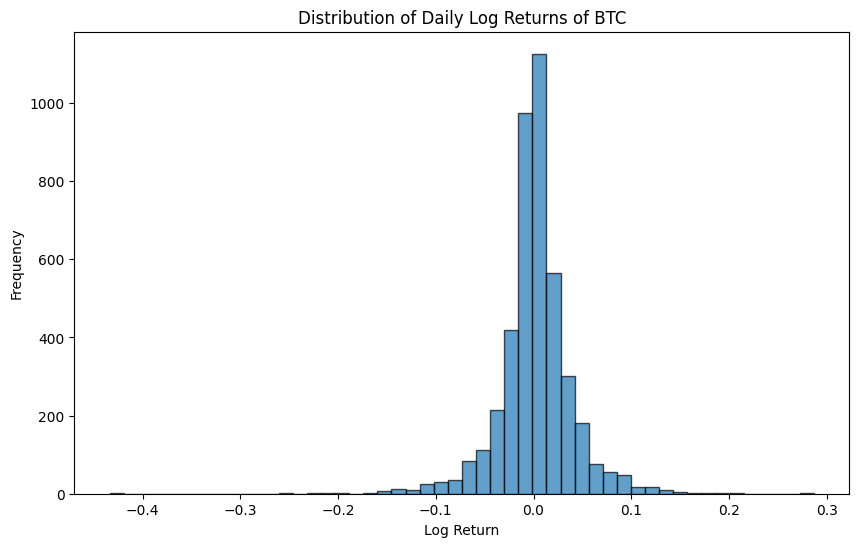

In [35]:
# Plot the distribution of daily returns
plt.figure(figsize=(10, 6))
plt.hist(df['log_returns'], bins=50, edgecolor='black', alpha=0.7)
plt.title('Distribution of Daily Log Returns of BTC')
plt.xlabel('Log Return')
plt.ylabel('Frequency')
plt.show()

In [36]:
# Save the processed data
df.to_csv('./historicalData/processed_btc_data.csv')